In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scripts.find_trades import *
import statistics

In [2]:
df = pd.read_csv('look.csv', delimiter=';')
df.fillna(0, inplace=True)

In [3]:
def find_average(row):
    try:
        return sum([row['bid_price_1'] * row['bid_volume_1'], row['bid_price_2'] * row['bid_volume_2'],
    row['bid_price_3'] * row['bid_volume_3'], row['ask_price_3'] * row['ask_volume_3'], row['ask_price_2'] * row['ask_volume_2'],
    row['ask_price_1'] * row['ask_volume_1'] ]) / sum([row['bid_volume_1'], row['bid_volume_2'], row['bid_volume_3'],
                                                    row['ask_volume_1'], row['ask_volume_2'], row['ask_volume_3']])
    except:
        return 0

df['avg_price'] = df.apply(find_average, axis=1)

In [5]:
def check_validity():
    # success_lst = []
    # for test in range(2, 20):
    past_vals = 15
        
    df_star = df[df["product"] == "ROSES"]
    df_star = df_star.reset_index()
    print(df_star)
    success = 0
    lst = np.array([])
    x = np.array([i for i in range(past_vals)])
    time = []
    gradient_lst = []
    for index, row in df_star.iterrows():
        if index == len(df_star)-1:
            break
        curr_avg = row["avg_price"]
        curr_mid = row["mid_price"]
        next_mid = df_star.iloc[index+1]["mid_price"]

        if len(lst) < past_vals:
            lst = np.append(lst, curr_avg)
            continue
        else:
            lst = lst[1:]
            lst = np.append(lst, curr_avg)
            
        
        gradient, c = np.polyfit(x, lst, 1)
        time.append(row["timestamp"])
        gradient_lst.append(lst.tolist())

        if len(lst) >= past_vals:
            diff_lst = []
            for i in range(past_vals):
                c_avg = df_star.iloc[index-i]["mid_price"]
                c_lin_reg = gradient * (past_vals - i) + c
                diff = c_lin_reg - c_avg
                diff_lst.append(diff)


            sd = statistics.stdev(diff_lst, 0)
        else:
            sd = 1
        # df["lin_reg_avg_price"] = df
        # print(c, gradient)
        # predicting a down trend
        # if curr_avg - curr_mid < 0:
        pred = (past_vals+1) * gradient + c
        pred = float(round(pred * 2) / 2)
        # give a buffer
        # print(f"pred: {pred}, next_mid: {float(next_mid)}")
        print(f"sd: {sd}")
        if next_mid < (pred + 0.9 * sd) and next_mid > (pred - 0.9 * sd):
            print(f"pred: {pred}, next_mid: {next_mid}")
            success += 1

        # if pred == next_mid:
        #     success += 1

            # if gradient < 0:
            #     if next_mid < curr_mid:
            #         success += 1
            
            # # if curr_avg - curr_mid > 0:
            # if gradient > 0:
            #     if next_mid > curr_mid:
            #         success += 1
        # success_lst.append(success)
        # print(test)
        # return success
        
    
    # return gradient_lst, time
    return success
# time, gradient_lst = check_validity()
# gradient_lst, time = check_validity()
success = check_validity()

     index  day  timestamp product  bid_price_1  bid_volume_1  bid_price_2  \
0        0    2          0   ROSES        14421            30      14420.0   
1       11    2        100   ROSES        14423            57          0.0   
2       20    2        200   ROSES        14422            67          0.0   
3       21    2        300   ROSES        14421            64          0.0   
4       28    2        400   ROSES        14421            68          0.0   
..     ...  ...        ...     ...          ...           ...          ...   
995   6969    2      99500   ROSES        14401            61          0.0   
996   6977    2      99600   ROSES        14402            66          0.0   
997   6980    2      99700   ROSES        14402            28      14401.0   
998   6987    2      99800   ROSES        14401            55          0.0   
999   6998    2      99900   ROSES        14405            64          0.0   

     bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_

In [7]:
success/len(df[df["product"] == "ROSES"])

0.373

In [29]:
# check the change in degrees instead

def check_validity():
    # success_lst = []
    # for test in range(2, 20):
    past_vals = 15
        
    df_star = df[df["product"] == "ROSES"]
    df_star = df_star.reset_index()
    print(df_star)
    success = 0
    total = 0
    lst = np.array([])
    x = np.array([i for i in range(past_vals)])
    time = []
    gradient_lst = []
    degrees = []
    for index, row in df_star.iterrows():
        if index == len(df_star)-1:
            break
        curr_avg = row["avg_price"]
        curr_mid = row["mid_price"]
        next_mid = df_star.iloc[index+1]["mid_price"]

        if len(lst) < past_vals:
            lst = np.append(lst, curr_avg)
            continue
        else:
            lst = lst[1:]
            lst = np.append(lst, curr_avg)
            
        
        gradient, c = np.polyfit(x, lst, 1)
        degree = np.arctan(gradient) * (180/np.pi)
        degrees.append(degree)

        

        time.append(row["timestamp"])
        gradient_lst.append(lst.tolist())

        if len(lst) >= past_vals:
            diff_lst = []
            for i in range(past_vals):
                c_avg = df_star.iloc[index-i]["mid_price"]
                c_lin_reg = gradient * (past_vals - i) + c
                diff = c_lin_reg - c_avg
                diff_lst.append(diff)


            sd = statistics.stdev(diff_lst, 0)
        else:
            sd = 1
        # df["lin_reg_avg_price"] = df
        # print(c, gradient)
        # predicting a down trend
        # if curr_avg - curr_mid < 0:
        pred = (past_vals+1) * gradient + c
        pred = float(round(pred * 2) / 2)
        # give a buffer
        # print(f"pred: {pred}, next_mid: {float(next_mid)}")
        if len(degrees) > 5:
            # check the most recent 5 degrees. they must be approx the same
            # the approx is gonna be an error of 10 degrees from the max and the min
            deg5 = degrees[-5:]
            if abs(max(deg5) - min(deg5)) <= 10:
                # print(f"sd: {sd}")
                if next_mid < (pred + 1.9 * sd) and next_mid > (pred - 1.9 * sd):
                    print(f"pred: {pred}, next_mid: {next_mid}")
                    success += 1
                total += 1

        # if pred == next_mid:
        #     success += 1

            # if gradient < 0:
            #     if next_mid < curr_mid:
            #         success += 1
            
            # # if curr_avg - curr_mid > 0:
            # if gradient > 0:
            #     if next_mid > curr_mid:
            #         success += 1
        # success_lst.append(success)
        # print(test)
        # return success
        
    
    # return gradient_lst, time
    return success, total, degrees
# time, gradient_lst = check_validity()
# gradient_lst, time = check_validity()
success, total, degrees = check_validity()

     index  day  timestamp product  bid_price_1  bid_volume_1  bid_price_2  \
0        0    2          0   ROSES        14421            30      14420.0   
1       11    2        100   ROSES        14423            57          0.0   
2       20    2        200   ROSES        14422            67          0.0   
3       21    2        300   ROSES        14421            64          0.0   
4       28    2        400   ROSES        14421            68          0.0   
..     ...  ...        ...     ...          ...           ...          ...   
995   6969    2      99500   ROSES        14401            61          0.0   
996   6977    2      99600   ROSES        14402            66          0.0   
997   6980    2      99700   ROSES        14402            28      14401.0   
998   6987    2      99800   ROSES        14401            55          0.0   
999   6998    2      99900   ROSES        14405            64          0.0   

     bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_

In [33]:
success
total
success/total

0.62

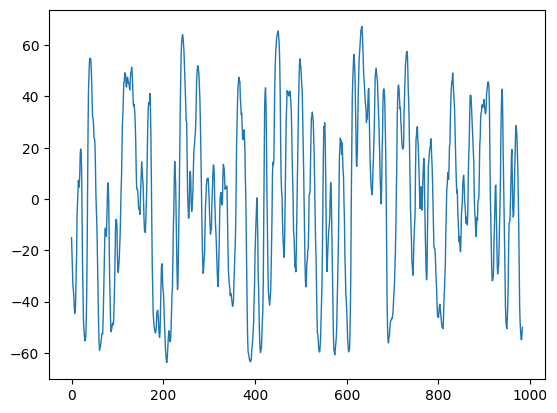

In [24]:
degrees
x = [i for i in range(len(degrees))]

plt.plot(x, degrees, linewidth=1)
plt.show()